# Amadeus challenge

In [1]:
pwd

u'/home/frallain/workspace/amadeus_challenge'

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

import sys
import csv
import datetime as dt
import itertools
import time

from GeoBases import GeoBase



## First exercise : count the number of lines in Python for each file

In [3]:
with open('bookings.csv') as f:
    for i,line in enumerate(f):
        pass
print(i+1)

10000011


In [4]:
with open('searches.csv') as f:
    for i,line in enumerate(f):
        pass
print(i+1)

20390199


## Second exercise : top 10 arrival airports in the world in 2013 (using the bookings file)

Arrival airport is the column arr_port. It is the IATA code for the airport

To get the total number of passengers for an airport, you can sum the column pax, 
grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. 
So to get the total number of passengers that have actually booked, 
you should sum including the negatives (that will remove the cancelled bookings).

Print the top 10 arrival airports in the standard output, including the number of passengers.

Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

Bonus point: Solve this problem using pandas (instead of any other approach)

In [5]:
# loading only the relevant columns
bookings = pd.read_csv('bookings.csv', sep='^', usecols=('arr_port','pax'))
bookings.columns = bookings.columns.str.strip()
bookings['arr_port'] = bookings['arr_port'].str.strip()

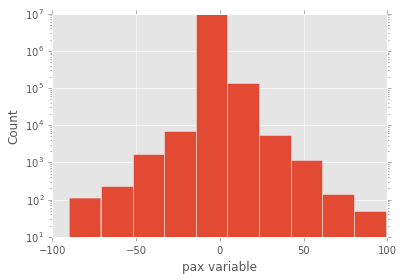

In [6]:
bookings.pax.hist()
plt.yscale('log')
plt.xlabel('pax variable')
plt.ylabel('Count')

In [7]:
answer2 = pd.DataFrame( bookings.groupby('arr_port')['pax'].sum() )

sum(bookings[bookings.arr_port=='ZSE']['pax'])

10.0

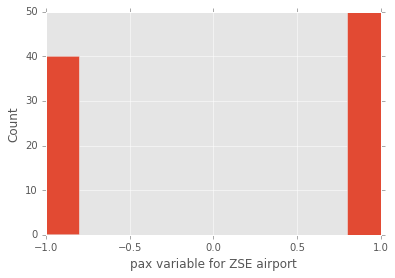

In [8]:
# Just to check that there is a difference of 10 between +1 and -1 bookings
bookings[bookings.arr_port=='ZSE']['pax'].hist()
plt.xlabel('pax variable for ZSE airport')
plt.ylabel('Count')

In [9]:
# sudo pip install geobases
geo_o = GeoBase(data='ori_por', verbose=False)
iata2city = {}
for iata in answer2.index:
    try:
        iata2city[iata] = geo_o.get(iata)['name']
    except KeyError:
        pass
answer2['Name'] = answer2.index.map(lambda x: iata2city.get(x,'') )
answer2.sort_values(by='pax',ascending=False, inplace=True)
answer2[:10]

,pax,Name
arr_port,,
LHR,88809,London Heathrow Airport
MCO,70930,Orlando International Airport
LAX,70530,Los Angeles International Airport
LAS,69630,Mc Carran International Airport
JFK,66270,John F Kennedy International Airport
CDG,64490,Paris - Charles-de-Gaulle
BKK,59460,Suvarnabhumi
MIA,58150,Miami International Airport
SFO,58000,San Francisco International Airport


## Third exercise: plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, 
in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)

In [10]:
# loading only the relevant columns
searches = pd.read_csv('searches.csv', sep='^', usecols=('Date','Destination'))
searches.shape

(20390198, 2)

In [11]:
# filtering data by keeping data only for Málaga, Madrid and Barcelona airports 
geo_o = GeoBase(data='ori_por', verbose=False)
malaga_iatas = geo_o.fuzzyFind('Málaga', 'name')
malaga_iatas

[(1.0, 'AGP@1'), (0.9, 'AGP')]

In [12]:
madrid_iatas = geo_o.fuzzyFind('Madrid', 'name')
madrid_iatas

[(1.0, 'MAD@1'),
 (0.9, 'XTI'),
 (0.9, 'XOC'),
 (0.9, 'TOJ'),
 (0.9, 'MAD'),
 (0.7692307692307693, 'IXM@1')]

In [13]:
barcelona_iatas = geo_o.fuzzyFind('Barcelona', 'name')
barcelona_iatas

[(1.0, 'BLA@1'),
 (1.0, 'BCN@1'),
 (0.9, 'YJD'),
 (0.9, 'YJB'),
 (0.9, 'XJB'),
 (0.8235294117647058, 'BAZ@1'),
 (0.7777777777777778, 'QAK@1'),
 (0.7777777777777778, 'QAK'),
 (0.75, 'BCA@1')]

In [14]:
dests = searches.Destination.unique()

[ dest for dest in dests if "@" in str(dest) ]



[]

In [15]:
city2iatas = {}
city2iatas['Málaga'] = [ iata.rstrip('@1') for score,iata in malaga_iatas if score>=0.9 ]
city2iatas['Madrid'] = [ iata.rstrip('@1') for score,iata in madrid_iatas if score>=0.9 ]
city2iatas['Barcelona'] = [ iata.rstrip('@1') for score,iata in barcelona_iatas if score>=0.9 ]
city2iatas

{'Barcelona': ['BLA', 'BCN', 'YJD', 'YJB', 'XJB'],
 'Madrid': ['MAD', 'XTI', 'XOC', 'TOJ', 'MAD'],
 'M\xc3\xa1laga': ['AGP', 'AGP']}

In [16]:
iatas_of_interest = city2iatas.values()
iatas_of_interest = list(itertools.chain.from_iterable(iatas_of_interest))
iatas_of_interest

['MAD',
 'XTI',
 'XOC',
 'TOJ',
 'MAD',
 'AGP',
 'AGP',
 'BLA',
 'BCN',
 'YJD',
 'YJB',
 'XJB']

In [17]:
searches = searches[searches.Destination.isin(iatas_of_interest)]
searches.shape

(677631, 2)

In [18]:
searches['Date'] = pd.to_datetime(searches['Date'],format='%Y-%m-%d')
searches.index= searches['Date']

In [19]:
tableau2 = searches.groupby(by=[searches.Destination, searches.index.year, searches.index.month ]).count()
tableau2

Date
Destination               
AGP         2013 1    9633
                 2    8379
                 3   10659
                 4    8265
                 5   10830
                 6    7923
                 7    8892
                 8    7866
                 9    8151
                 10   6499
                 11   6384
                 12   3696
BCN         2013 1   29469
                 2   28329
                 3   30552
                 4   31236
                 5   28728
                 6   26505
                 7   29241
                 8   27075
                 9   23427
                 10  20276
                 11  19824
                 12  15400
BLA         2013 1      57
                 3      57
                 4      57
                 6      57
                 7      57
                 8     285
                 9     228
                 11     56
                 12    112
MAD         2013 1   24258
                 2   22800
                 3   24681
                 4   25251
                 5   26334
                 6   22800
                 7   22971
                 8   21831
                 9   21147
                 10  22294
                 11  20272
                 12  14504
TOJ         2013 8      57
                 9      57
XTI         2013 2      57
YJB         2013 10     56
                 11     56

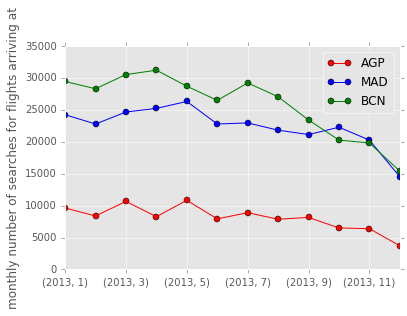

In [20]:
f, a = plt.subplots(1,1)
tableau2.xs('AGP').plot(style='-or', ax=a)
tableau2.xs('MAD').plot(style='-ob', ax=a)
tableau2.xs('BCN').plot(style='-og', ax=a)
plt.legend(['AGP','MAD','BCN'])
plt.ylabel('monthly number of searches for flights arriving at')

## Fourth exercise: match searches with bookings

For every search in the searches file, find out whether the search ended up in a booking or not 
(using the info in the bookings file). For instance, search and booking origin and destination 
should match. 
For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
Generate a CSV file with the search data, and an additional field, containing 1 if the search 
ended up in a booking, and 0 otherwise.

Bonus point: Solving this problem using pandas (instead of any other approach)

In [22]:
searches = pd.read_csv('searches.csv', sep='^', usecols=('Date','Origin','Destination','NbSegments','Seg1Departure','Seg1Arrival','Seg1Date'))

In [23]:
searches['Date'] = pd.to_datetime(searches['Date'],format='%Y-%m-%d')

ValueError: time data '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV' does match format specified

In [24]:
errors = searches[searches.Date.str.contains(',')]

In [25]:
errors.Date.tolist()

['2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV',
 '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV',
 '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV',
 '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV',
 '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV',
 '2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd

In [26]:
for error in errors.Date.tolist():
    Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice = error.split(',')
    print [Date, NbSegments, Seg1Departure, Seg1Arrival, Seg1Date]

    searches = searches.append({'Date':Date, 
                                'Origin':Origin,
                                'Destination':Destination, 
                                'NbSegments':int(NbSegments), 
                                'Seg1Departure':Seg1Departure, 
                                'Seg1Arrival':Seg1Arrival, 
                                'Seg1Date':Seg1Date}, 
                               ignore_index=True)
print searches.shape

['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-01-04']
['2013-01-01', '1', 'ATH', 'MIL', '2013-

In [27]:
print searches.shape
errors.index
searches.drop(errors.index, inplace=True)
print searches.shape # 20390198 rows

(20390231, 7)
(20390198, 7)


In [ ]:
searches['Date'] = pd.to_datetime(searches['Date'],format='%Y-%m-%d')

In [49]:
searches.Date.describe()

count                20390198
unique                    359
top       2013-01-01 00:00:00
freq                    57330
first     2013-01-01 00:00:00
last      2013-12-25 00:00:00
Name: Date, dtype: object

In [28]:
searches['Seg1Date'] = pd.to_datetime(searches['Seg1Date'],format='%Y-%m-%d')
searches['Seg1Departure'] = searches['Seg1Departure'].str.strip()
searches['Seg1Arrival'] = searches['Seg1Arrival'].str.strip()
searches['Origin'] = searches['Origin'].str.strip()
searches['Destination'] = searches['Destination'].str.strip()

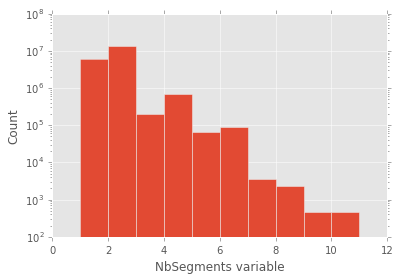

In [29]:
searches.NbSegments.hist()
plt.yscale('log')
plt.xlabel('NbSegments variable')
plt.ylabel('Count')

In [30]:
bookings = pd.read_csv('bookings.csv', sep='^', usecols=('act_date           ','cre_date           ','dep_port','arr_port','brd_time           '))

In [31]:
bookings.head()

,act_date,cre_date,dep_port,arr_port,brd_time
0,2013-03-05 00:00:00,2013-02-22 00:00:00,ZRH,LHR,2013-03-07 08:50:00
1,2013-03-26 00:00:00,2013-03-26 00:00:00,SAL,CLT,2013-04-12 13:04:00
2,2013-03-26 00:00:00,2013-03-26 00:00:00,SAL,CLT,2013-07-15 07:00:00
3,2013-03-26 00:00:00,2013-03-26 00:00:00,AKL,SVO,2013-04-24 23:59:00
4,2013-03-26 00:00:00,2013-03-26 00:00:00,AKL,SVO,2013-05-14 20:15:00


In [32]:
bookings.columns = bookings.columns.str.strip()
bookings['dep_port'] = bookings['arr_port'].str.strip()
bookings['arr_port'] = bookings['arr_port'].str.strip()

In [33]:
# bookings['brd_time'] = pd.to_datetime(bookings['brd_time'],format='%Y-%m-%d %H:%M:%S')
bookings[bookings.brd_time == '3']

,act_date,cre_date,dep_port,arr_port,brd_time
5000007,2013-03-25 00:00:00,60,SG,SG,3


In [34]:
bookings['brd_time'] = pd.to_datetime(bookings['brd_time'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [35]:
bookings['act_date'] = pd.to_datetime(bookings['act_date'],format='%Y-%m-%d %H:%M:%S')
bookings['cre_date'] = pd.to_datetime(bookings['cre_date'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [36]:
bookings['brd_time'].describe()

count                10000009
unique                 167848
top       2013-09-26 12:55:00
freq                     1330
first     2012-03-02 12:15:00
last      2014-12-20 13:35:00
Name: brd_time, dtype: object

In [37]:
bookings['act_date'].describe()

count                10000010
unique                    365
top       2013-01-16 00:00:00
freq                   133330
first     2013-01-01 00:00:00
last      2013-12-31 00:00:00
Name: act_date, dtype: object

In [38]:
bookings['cre_date'].describe()

count                10000008
unique                    716
top       2013-01-14 00:00:00
freq                   132250
first     2011-03-01 00:00:00
last      2013-12-31 00:00:00
Name: cre_date, dtype: object

In [ ]:
bookings = bookings.sort_values(by='act_date')
# bookings['act_date'].searchsorted('2013-07-19', 'right')[0]

In [62]:
start = time.time()
search2booking = []

for i, Date, Origin, Destination, NbSegments,Seg1Departure,Seg1Arrival,Seg1Date in searches.itertuples():# 20 390 198 rows
    if i == 10: break
    result = bookings[ (bookings.act_date == Date) &
                   (bookings.dep_port == Origin) & 
                   (bookings.arr_port == Destination) ]
    if not result.empty:
        search2booking.append(i)
print time.time() - start

15.3022699356


15 second per row... What is wrong with filtering in one pass ?

In [65]:
start = time.time()
search2booking = []
# 20 390 198
for i, Date, Origin, Destination, NbSegments,Seg1Departure,Seg1Arrival,Seg1Date in searches.itertuples():# 20 390 198 rows
    
    if i == 1000: break
    f1 = bookings[ bookings.act_date == Date ]
    f2 = f1[ (f1.dep_port == Origin) ]
    f3 = f2[ (f2.arr_port == Destination) ]
    if not f3.empty:
        print f3
        search2booking.append(i)
    
print time.time() - start

31.023665905


30 seconds for 1000 rows => 30 * 20 390 / 60 = 10195 minutes = 170 hours...

In [ ]:
#     left = bookings['act_date'].searchsorted(Date, 'left')
#     right = bookings['act_date'].searchsorted(Date, 'right')
#     f1 = bookings[ bookings.act_date == Date ]
#     f2 = f1[ (f1.dep_port == Origin) ]
#     f3 = f2[ (f2.arr_port == Destination) ]
#     if not f3.empty:
#         print f3
#         search2booking.append(i)

## Bonus exercise: write a Web Service

Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output). The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X.”
